# Análisis de Datos Exploratorio

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyspark.pandas as ps
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


Primero, importemos los datos y hagamos una revisión de los tipos de datos del archivo dados

In [118]:
#Carguemos la URL de los archivos!
load_dotenv()


data_path = os.getenv('DATA_PATH')

In [172]:
init_df = pd.read_excel(data_path)

In [ ]:
print(init_df.info())
print(init_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146939 entries, 0 to 146938
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IdentificadorCliente                    146939 non-null  int64  
 1   FechaEvento                             146939 non-null  object 
 2   UsabilidadCupo                          146939 non-null  object 
 3   CategoriaPrincipalCredito               114111 non-null  object 
 4   DiasMaximosMoraCreditosGenerados        108968 non-null  float64
 5   NumeroCreditosGPrevius                  115051 non-null  float64
 6   NumeroCreditosGCanalFPrevius            115051 non-null  float64
 7   NumeroCreditosGEstadoActivosPrevius     115051 non-null  float64
 8   NumeroCreditosGEstadoPagadosPrevius     115051 non-null  float64
 9   NumeroCreditosGCanalVPrevius            115051 non-null  float64
 10  NumeroCreditosLPrevius                  1150

De este primer acercamiento a la base de datos, nos damos cuenta que las variables que representan numeros de créditos tienen 111065 datos no nulos, que, con respecto a la cantidad total de casos dados, hay 35874 casos que no disponen de información sobre cantidad de créditos anteriores, ni en el sentido global ni local. Es importante notar que no se podría asumir que estos casos sin información corresponden con personas que no han sacado créditos, ya que aquellas personas tienen un valor de 0 en estos campos. 

También, notamos que hay una cantidad total de 30 variables, de las cuales una corresponde con la que se quiere predecir, 'PerdidaCartera'.

Veamos ahora la distribución de la variable a predecir, es decir, 'PerdidaCartera', que representa si el cliente paga o no paga el actual crédito que tiene en 'Temu'.

In [175]:
# Veamos cuales tienen perdida de cartera de 1 - es decir, que no pagó

perdida_cartera = init_df[init_df['PerdidaCartera'] == 1]

print(perdida_cartera.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33136 entries, 6 to 146937
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdentificadorCliente                    33136 non-null  int64  
 1   FechaEvento                             33136 non-null  object 
 2   UsabilidadCupo                          33136 non-null  object 
 3   CategoriaPrincipalCredito               27876 non-null  object 
 4   DiasMaximosMoraCreditosGenerados        21449 non-null  float64
 5   NumeroCreditosGPrevius                  23397 non-null  float64
 6   NumeroCreditosGCanalFPrevius            23397 non-null  float64
 7   NumeroCreditosGEstadoActivosPrevius     23397 non-null  float64
 8   NumeroCreditosGEstadoPagadosPrevius     23397 non-null  float64
 9   NumeroCreditosGCanalVPrevius            23397 non-null  float64
 10  NumeroCreditosLPrevius                  23397 non-null  float6

Se tienen, dentro de los datos datos, unos 33136 casos de no pagos. Esto es, de los 146939 casos dados, 22.55% corresponde a casos de créditos no pagos.

Veamos también la cantidad de datos únicos por columna.

In [176]:
init_df.nunique()

IdentificadorCliente                      146939
FechaEvento                               146939
UsabilidadCupo                            107705
CategoriaPrincipalCredito                     31
DiasMaximosMoraCreditosGenerados            1766
NumeroCreditosGPrevius                       207
NumeroCreditosGCanalFPrevius                 206
NumeroCreditosGEstadoActivosPrevius           26
NumeroCreditosGEstadoPagadosPrevius          206
NumeroCreditosGCanalVPrevius                  42
NumeroCreditosLPrevius                        31
NumeroCreditosLEstadoActivosPrevius            9
NumeroCreditosLEstadoPagadosPrevius           24
FechaVinculacionCliente                     3116
FechaPrimerUso                              4894
FechaUltimoUso                              2201
TotalPagosEfectuadosGlobalmentePrevius       511
TotalPagosEfectuadosLocalmentePrevius         57
CodigoAlmacenEntregaTC                     83156
CodigoMunicipioEntregaTC                     437
TipoMunicipioEntrega

Y también la cantidad de nulos por cada una de las columnas

In [177]:
init_df.isnull().sum()

IdentificadorCliente                          0
FechaEvento                                   0
UsabilidadCupo                                0
CategoriaPrincipalCredito                 32828
DiasMaximosMoraCreditosGenerados          37971
NumeroCreditosGPrevius                    31888
NumeroCreditosGCanalFPrevius              31888
NumeroCreditosGEstadoActivosPrevius       31888
NumeroCreditosGEstadoPagadosPrevius       31888
NumeroCreditosGCanalVPrevius              31888
NumeroCreditosLPrevius                    31888
NumeroCreditosLEstadoActivosPrevius       31888
NumeroCreditosLEstadoPagadosPrevius       31888
FechaVinculacionCliente                    1824
FechaPrimerUso                            35874
FechaUltimoUso                            35874
TotalPagosEfectuadosGlobalmentePrevius    39016
TotalPagosEfectuadosLocalmentePrevius     39016
CodigoAlmacenEntregaTC                        0
CodigoMunicipioEntregaTC                   1830
TipoMunicipioEntregaTC                  

Esto, en un sentido porcentual, indica lo siguiente:

In [178]:
init_df.isna().mean().sort_values(ascending=False) * 100


TotalPagosEfectuadosGlobalmentePrevius    26.552515
TotalPagosEfectuadosLocalmentePrevius     26.552515
DiasMaximosMoraCreditosGenerados          25.841336
UsoAppWeb                                 24.533990
FechaUltimoUso                            24.414213
FechaPrimerUso                            24.414213
CategoriaPrincipalCredito                 22.341244
NumeroCreditosLPrevius                    21.701522
NumeroCreditosLEstadoPagadosPrevius       21.701522
NumeroCreditosLEstadoActivosPrevius       21.701522
NumeroCreditosGPrevius                    21.701522
NumeroCreditosGEstadoPagadosPrevius       21.701522
NumeroCreditosGEstadoActivosPrevius       21.701522
NumeroCreditosGCanalFPrevius              21.701522
NumeroCreditosGCanalVPrevius              21.701522
CodigoMunicipioEntregaTC                   1.245415
TipoMunicipioEntregaTC                     1.245415
FechaVinculacionCliente                    1.241331
Edad                                       1.087526
CupoAprobado

De aqui, se puede ver que las variables de TotalPagos, tanto en un sentido global como local, corresponden con la de mayor cantidad de nulos. Note que esto puede representar o que el usuario nunca ha realizado un pago - puede que por que sea su primer credito en general. Para esto, hagamos una inspección más cercana con estos datos. Específicamente, revisaremos aquellos casos que tengan creditos y revisaremos su cantidad de días de mora. 

In [179]:
mask_nulos = init_df["TotalPagosEfectuadosGlobalmentePrevius"].isna()
#Esto corresponde a aquellos casos que no tienen información sobre pagos previos.

init_df.loc[mask_nulos, ["NumeroCreditosGPrevius", "NumeroCreditosLPrevius", "DiasMaximosMoraCreditosGenerados", "DiasMora"]].describe()


,NumeroCreditosGPrevius,NumeroCreditosLPrevius,DiasMaximosMoraCreditosGenerados,DiasMora
count,7130.000000,7130.000000,2900.000000,39016.000000
mean,0.934502,0.449790,0.171034,290.719243
std,0.936204,0.752098,3.864877,515.652506
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,394.250000
max,16.000000,11.000000,155.000000,1800.000000


Como se puede ver, por su valor en media y mediana, al menos el 50% de estos casos no han sacado creditos en Temu. Además, viendo la cantidad de dias máximos en mora, se puede notar que al menos el 75% de estos casos no han tenido un solo día de mora. Analicemos a aquellos que al menos hayan sacado un crédito y revisemos si su cantidad de pagos nula representa en realidad un 0 en pagos.

In [180]:
mask = (
    init_df["TotalPagosEfectuadosGlobalmentePrevius"].isna() &
    (init_df["NumeroCreditosGPrevius"] >= 1)
)
#Mascara para aquellos que tienen al menos un credito y no tienen pagos previos.

clientes_inconsistentes = init_df.loc[mask]

clientes_inconsistentes[["DiasMora", "DiasMaximosMoraCreditosGenerados"]].describe()

,DiasMora,DiasMaximosMoraCreditosGenerados
count,4927.000000,1586.000000
mean,331.951898,0.102144
std,538.950487,2.443746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,568.500000,0.000000
max,1798.000000,76.000000


Como se puede ver, los casos con pagos nulos y con al menos un crédito anterior a este tienen también una cantidad de días de mora muy pequeña - esto pues al menos el 75% de ellos tienen uan cantidad de dias maximos de mora de 0! Por tanto, el hecho que no tengan valor en pagos indica genuina falta de información y deberán ser amputados para el posterior análisis de datos. 

Por otro lado, los casos anteriores en los que no había información sobre pagos y su cantidad de creditos anterior a este era 0 y sin dias de mora, es porque genuinamente no han realizado pagos anteriormente. Perder su información amputandolos sería erroneo ya que principalmente representan clientes nuevos para el negocio y es importante considerar su comportamiento al momento de predecir si pagan o no. Por tanto, se les pondrá un valor de 0.

In [181]:
cols_pagos = [
    "TotalPagosEfectuadosGlobalmentePrevius",
    "TotalPagosEfectuadosLocalmentePrevius"
]

# Condición: sin créditos previos (globales - que implica necesariamente locales)
mask_sin_creditos = (
    (init_df["NumeroCreditosGPrevius"].fillna(0) == 0) 
)

# Imputar con 0 SOLO si no tiene créditos previos
init_df.loc[mask_sin_creditos, cols_pagos] = init_df.loc[mask_sin_creditos, cols_pagos].fillna(0)

Verifiquemos la nueva cantidad de nulos:

In [182]:
init_df.isna().mean().sort_values(ascending=False) * 100

DiasMaximosMoraCreditosGenerados          25.841336
UsoAppWeb                                 24.533990
FechaPrimerUso                            24.414213
FechaUltimoUso                            24.414213
CategoriaPrincipalCredito                 22.341244
NumeroCreditosGPrevius                    21.701522
NumeroCreditosLPrevius                    21.701522
NumeroCreditosLEstadoActivosPrevius       21.701522
NumeroCreditosLEstadoPagadosPrevius       21.701522
NumeroCreditosGCanalVPrevius              21.701522
NumeroCreditosGEstadoActivosPrevius       21.701522
NumeroCreditosGEstadoPagadosPrevius       21.701522
NumeroCreditosGCanalFPrevius              21.701522
TotalPagosEfectuadosGlobalmentePrevius     3.353092
TotalPagosEfectuadosLocalmentePrevius      3.353092
CodigoMunicipioEntregaTC                   1.245415
TipoMunicipioEntregaTC                     1.245415
FechaVinculacionCliente                    1.241331
Edad                                       1.087526
CupoAprobado

Como se pudo ver, pudimos reducir sustancialmente estos nulos erroneos como 0! 

Ahora, como se puede observar, quedan muchos nulos en DiasMaximosMora, UsoAppWeb, FechaPrimerUso, FechaUltimoUso y CategoriaPrincipalCredito. 
Para los nulos de DiasMaximosMora, volvamos 0 a aquellos casos en los que nunca se haya sacado un credito anteriormente, ya que tiene sentido asumir que como nunca habian sacado creditos anteriores, no tendrías Mora. Ahora, para evitar que el modelo considere esto como algo muy positivo, generaremos la variable indicadora 'PrimerCredito', que vale 1 en caso de que este sea el primer credito de un usuario (esto es, si NumerosCreditosGPrevius es 0), y 0 en caso contrario (mientras no sea Nulo). 

In [183]:
# Definir la condición de "sin créditos previos"
mask_sin_creditos = (
    (init_df["NumeroCreditosGPrevius"].fillna(0) == 0)
)

# Imputar con 0 solo si nunca ha tenido créditos previos
init_df.loc[mask_sin_creditos, "DiasMaximosMoraCreditosGenerados"] = (
    init_df.loc[mask_sin_creditos, "DiasMaximosMoraCreditosGenerados"].fillna(0)
)

# Crear variable indicadora 'PrimerCredito'
# 1 si nunca tuvo créditos previos, 0 si tiene >=1 crédito
# (ignora nulos para no confundir "dato faltante" con "sin créditos")
init_df["PrimerCredito"] = (
    init_df["NumeroCreditosGPrevius"].fillna(0) == 0
).astype(int)


Veamos la nueva distribución de nulos:

In [184]:
init_df.isna().mean().sort_values(ascending=False) * 100

UsoAppWeb                                 24.533990
FechaUltimoUso                            24.414213
FechaPrimerUso                            24.414213
CategoriaPrincipalCredito                 22.341244
NumeroCreditosGCanalVPrevius              21.701522
NumeroCreditosGEstadoPagadosPrevius       21.701522
NumeroCreditosGPrevius                    21.701522
NumeroCreditosLPrevius                    21.701522
NumeroCreditosLEstadoActivosPrevius       21.701522
NumeroCreditosLEstadoPagadosPrevius       21.701522
NumeroCreditosGCanalFPrevius              21.701522
NumeroCreditosGEstadoActivosPrevius       21.701522
DiasMaximosMoraCreditosGenerados           3.491925
TotalPagosEfectuadosGlobalmentePrevius     3.353092
TotalPagosEfectuadosLocalmentePrevius      3.353092
TipoMunicipioEntregaTC                     1.245415
CodigoMunicipioEntregaTC                   1.245415
FechaVinculacionCliente                    1.241331
Edad                                       1.087526
CupoAprobado

Como se puede ver, la distribución de nulos para la cantidad de DiasMaximosMora disminuyó mucho, ya que muchos de esos casos nunca habían sacado un credito antes. 
Ahora, para la variable UsoAppWeb, veamos la dsitribución interna de valores que se tiene actualmente:

In [185]:
init_df["UsoAppWeb"].value_counts(dropna=False, normalize=True)

UsoAppWeb
App    0.726628
NaN    0.245340
Web    0.028032
Name: proportion, dtype: float64

Como se puede ver, muchos de los valores han sido por App y una porción muy pequeña - solo 2%, han sido por Web. Veamos principalmente la significancia de estos con respecto a la variable predictora:


In [186]:
pd.crosstab(init_df["UsoAppWeb"], init_df["PerdidaCartera"], normalize="index")

PerdidaCartera,0,1
UsoAppWeb,,
App,0.763398,0.236602
Web,0.774945,0.225055


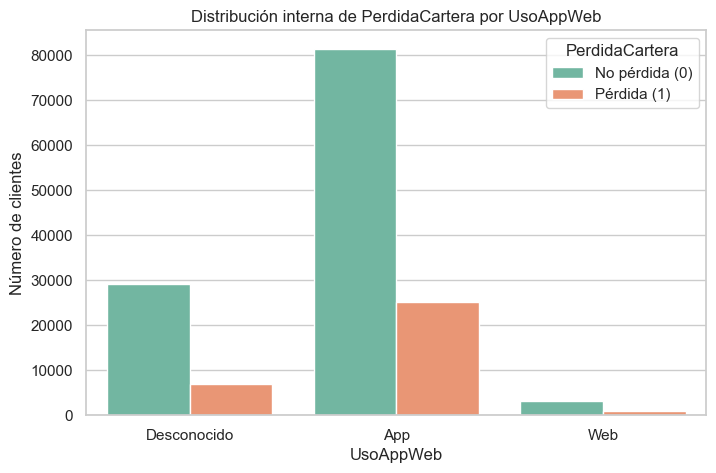

In [187]:

df_plot = init_df.copy()
df_plot["UsoAppWeb"] = df_plot["UsoAppWeb"].fillna("Desconocido")

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_plot,
    x="UsoAppWeb",
    hue="PerdidaCartera",   # dividir por variable predictora
    palette="Set2"
)

plt.title("Distribución interna de PerdidaCartera por UsoAppWeb")
plt.ylabel("Número de clientes")
plt.xlabel("UsoAppWeb")
plt.legend(title="PerdidaCartera", labels=["No pérdida (0)", "Pérdida (1)"])
plt.show()


Como se puede observar, para aquellos casos desconocidos se tiene una distribución parecida. Verifiquemos para cada clase su 'ratio' para verificar si es meramente proporción lo que diferencia a las clases:

In [188]:
df_plot = init_df.copy()
df_plot["UsoAppWeb"] = df_plot["UsoAppWeb"].fillna("Desconocido")


ratios = (
    df_plot.groupby("UsoAppWeb")["PerdidaCartera"]
    .mean()
    .reset_index()
    .rename(columns={"PerdidaCartera": "RatioPerdida"})
)

print(ratios)

     UsoAppWeb  RatioPerdida
0          App      0.236602
1  Desconocido      0.192705
2          Web      0.225055


Como se puede ver, el ratio de cada uno es similar. Aún así, el ratio de los desconocidos tiene un comportamiento mucho más pequeño a la de los demás casos. Esto descarta que: 
* **1**: Los desconocidos sea un error de lectura, ya que si lo fuera, al ser un error aleatorio, el valor de ratio de los Desconocidos o Nulos sería en algún valor medio entre los ratios de 'App' y de 'Web'.  
* **2**: Los desconocidos pertenezcan meramente a una de las clases. Esto pues si así fuera, tendrían un ratio cercano a alguna de ellas. 

Para evitar suposiciones erroneas y debido al comportamiento de Desconocido, asumiremos que es una clase por sí misma.

In [189]:
# Reemplazar nulos de UsoAppWeb por "Desconocido"
init_df["UsoAppWeb"] = init_df["UsoAppWeb"].fillna("Desconocido")


Para proseguir, analizaremos las variables temporales de mayor cantidad de nulos: FechaPrimerUso y FechaUltimoUso. Primero realizaremos una validación de coherencia temporal: comparar con las variables de primera vinculación y ultimo uso y evitar casos incoherentes como: 
* **1**: Que el primer uso sea anterior a la fecha de vinculación.
* **2**: Que el ultimo uso sea posterior a la fecha de ultimo uso. 
* **3**: Que el primer uso sea posterior al ultimo uso.


Tras revisión, sucede que Pandas pasó las fechas a un formato extraño, toca convertirlo antes:

In [ ]:
col = "FechaVinculacionCliente"
init_df[col] = pd.to_datetime(init_df[col], origin='1899-12-30', unit='D')

In [201]:
columnas_fecha = ["FechaPrimerUso", "FechaUltimoUso"]
for col in columnas_fecha:
    init_df[col] = pd.to_datetime(init_df[col], origin='1899-12-30', unit='D')


In [209]:
for col in ["FechaVinculacionCliente", "FechaPrimerUso", "FechaUltimoUso"]:
    init_df[col] = init_df[col].dt.tz_localize("UTC") 
    init_df[col] = init_df[col].dt.tz_convert("America/Bogota")

    #Pasar a zona horaria Bogotá!

Ya estando todas en datetime de Bogotá, si podemos hacer las validaciones de cohesión temporal!

In [213]:
mask_valid = (
    ((init_df["FechaPrimerUso"].isna()) | (init_df["FechaPrimerUso"] >= init_df["FechaVinculacionCliente"])) &
    ((init_df["FechaUltimoUso"].isna()) | (init_df["FechaUltimoUso"] >= init_df["FechaPrimerUso"])) &
    ((init_df["FechaEvento"].isna()) | (init_df["FechaEvento"] >= init_df["FechaVinculacionCliente"]))
)

clean_df = init_df[mask_valid].copy()
print(f"Se eliminaron {len(init_df) - len(clean_df)} filas por inconsistencias temporales (excluyendo nulos)")


Se eliminaron 22179 filas por inconsistencias temporales (excluyendo nulos)


Como se puede ver, habían muchas incosistencias temporales, especificamente un 15% de los datos. Veamos la nueva distribución de nulos.

In [215]:
clean_df.isna().mean().sort_values(ascending=False) * 100

FechaPrimerUso                            28.414556
FechaUltimoUso                            28.414556
NumeroCreditosGPrevius                    25.238057
NumeroCreditosGEstadoPagadosPrevius       25.238057
NumeroCreditosGCanalVPrevius              25.238057
NumeroCreditosGEstadoActivosPrevius       25.238057
NumeroCreditosGCanalFPrevius              25.238057
NumeroCreditosLEstadoPagadosPrevius       25.238057
NumeroCreditosLEstadoActivosPrevius       25.238057
NumeroCreditosLPrevius                    25.238057
CategoriaPrincipalCredito                 18.075505
TotalPagosEfectuadosGlobalmentePrevius     3.907502
TotalPagosEfectuadosLocalmentePrevius      3.907502
DiasMaximosMoraCreditosGenerados           3.793684
Edad                                       1.243988
CupoAprobado                               0.217217
NumeroIntentosFallidos                     0.026451
ScoreCrediticio                            0.024848
TipoMunicipioEntregaTC                     0.003206
CodigoMunici

Como se puede ver, aún muchos de los datos de primer uso y último uso siguen siendo nulos. Hagamos ahora sí un análisis interno de estos datos:

Primero, veamos como se distribuyen internamente: cuantos casos tienen a ambos como nulos, solo a uno, y demás combinaciones:

In [216]:
clean_df.assign(
    PrimerUso_Nulo=clean_df["FechaPrimerUso"].isna(),
    UltimoUso_Nulo=clean_df["FechaUltimoUso"].isna()
).groupby(["PrimerUso_Nulo", "UltimoUso_Nulo"]).size()


PrimerUso_Nulo  UltimoUso_Nulo
False           False             89310
True            True              35450
dtype: int64

Como se puede ver, no hay ningún caso en que solo se tenga una de ellas como nula: en todos se presentan ambas como nulas. Esto puede indicar un suceso o un comportamiento en específico - puede que sean casos nuevos y no se tenga un registro. Veamos cuantos de los que tienen nulos estas fechas son nuevos clientes (PrimerCredito):

In [217]:
# Filtrar los casos con ambas fechas nulas
mask_both_nulls = init_df["FechaPrimerUso"].isna() & init_df["FechaUltimoUso"].isna()

# Agrupar por la variable indicadora PrimerCredito
resumen_nulos = (
    init_df.loc[mask_both_nulls]
    .groupby("PrimerCredito")
    .size()
    .reset_index(name="Cantidad")
)



Como se puede ver, todos aquellos que tienen variables nulas en fecha son tambien personas que están realizando su primer crédito. 
Puede que entonces esto signifique que a estos clientes no se les tiene un registro de uso al ser clientes tan recientes.
Amputar a estos sería también una pérdida gigante de información, ya que son clientes cuyo comportamiento es imprescindible. Esto se puede notar con la siguiente grafica, que muestra la distribución de pérdidas con respecto a si son clientes nuevos o no.

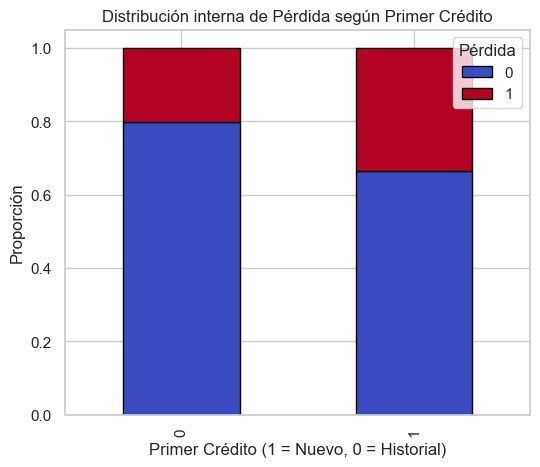

In [218]:

# Tabla de proporciones internas
tabla = pd.crosstab(clean_df["PrimerCredito"], clean_df["PerdidaCartera"], normalize="index")

# Plot
tabla.plot(kind="bar", stacked=True, figsize=(6,5), colormap="coolwarm", edgecolor="black")
plt.title("Distribución interna de Pérdida según Primer Crédito")
plt.ylabel("Proporción")
plt.xlabel("Primer Crédito (1 = Nuevo, 0 = Historial)")
plt.legend(title="Pérdida", loc="upper right")
plt.show()


Como se puede ver, la distribución de pérdidas es mayor en aquellos casos de primer crédito. Por tanto, esta variable tiene una significancia considerable y por tanto amputar estos sería una gran pérdida de información.
Siguiendo con el razonamiento para las fechas, debido a que estas no se podrían considerar como variables predictoras directamente (ya que su formato es de fecha), en realidad la variable predictora a considerar será la cantidad de días que lleva de forma activa con la tarjeta (FechaUltimoUso - FechaPrimerUso). Por tanto, en estos casos nuevos, tiene sentido asumir que esta longitud de días activos es cercana a distancia entre la fecha de vinculación y a la fecha de evento. 
En específico, definiremos las siguientes variables adicionales:
* **Dias como cliente**: Longitud en días de que lleva el Usuario como cliente: desde la vinculación al ultimo uso.
* **Dias como cliente activo**: Longitud en dias que lleva el Usuario como cliente activo: desde el primer uso  hasta el último uso.
* **Dias antes de evento cliente**: Longitud en dias que llevaba el usuario como cliente antes del evento.
* **Dias antes de evento cliente activo**: Longitud en dias que llevaba el usuario como cliente activo antes del evento.
* **Ratios**: Se sacarán las proporciones como variable predictora. Entre los ratios a usar están: 
    * Dias como cliente activo / Dias como cliente: Da una idea de cuanto esperó el usuario para usar su tarjeta la primera vez. Mientras más grande, implica que esperó menos.
    * Dias antes de evento cliente activo / Dias antes de evento cliente: Da una idea de cuanto esperó el usuario para usar su tarjeta en el evento. Mientras más grande, implica que esperó más.


Como hemos visto, muchos de los datos de PrimerUso y UltimoUso son nulos debido a que corresponden a primeros créditos - por tanto, en caso de ser nulos, pondremos los ratios y variables correspondientes como 0.

Antes de esto, aun hay que pasar la fecha de Evento a una de datetime Bogotá. Para esto, haremos lo siguiente:

In [224]:
clean_df['FechaEvento'] = pd.to_datetime(clean_df['FechaEvento'], utc=True)

# Convertir a hora de Bogotá
clean_df['FechaEvento'] = clean_df['FechaEvento'].dt.tz_convert("America/Bogota")

In [225]:
clean_df["DiasComoCliente"] = (clean_df["FechaUltimoUso"] - clean_df["FechaVinculacionCliente"]).dt.total_seconds() / (24*3600)
clean_df["DiasComoClienteActivo"] = (clean_df["FechaUltimoUso"] - clean_df["FechaPrimerUso"]).dt.total_seconds() / (24*3600) #Se calculó así ya que habían problemas haciendo dt.days().

clean_df["DiasAntesEventoCliente"] = (clean_df["FechaEvento"] - clean_df["FechaVinculacionCliente"]).dt.days
clean_df["DiasAntesEventoClienteActivo"] = (clean_df["FechaEvento"] - clean_df["FechaPrimerUso"]).dt.days

# Reemplazar negativos o nulos por 0
for col in ["DiasComoCliente", "DiasComoClienteActivo", "DiasAntesEventoCliente", "DiasAntesEventoClienteActivo"]:
    clean_df[col] = clean_df[col].fillna(0)
    clean_df[col] = clean_df[col].apply(lambda x: x if x > 0 else 0)

# Cálculo de ratios 

clean_df["RatioActividadTemprana"] = (
    clean_df["DiasComoClienteActivo"] / clean_df["DiasComoCliente"]
).astype(float)

clean_df["RatioActividadEvento"] = (
    clean_df["DiasAntesEventoClienteActivo"] / clean_df["DiasAntesEventoCliente"]
).astype(float)

# Reemplazar infinitos y nulos por 0
clean_df["RatioActividadTemprana"] = clean_df["RatioActividadTemprana"].replace([np.inf, -np.inf], np.nan).fillna(0)
clean_df["RatioActividadEvento"] = clean_df["RatioActividadEvento"].replace([np.inf, -np.inf], np.nan).fillna(0)



Veamos la distribución de los ratios!

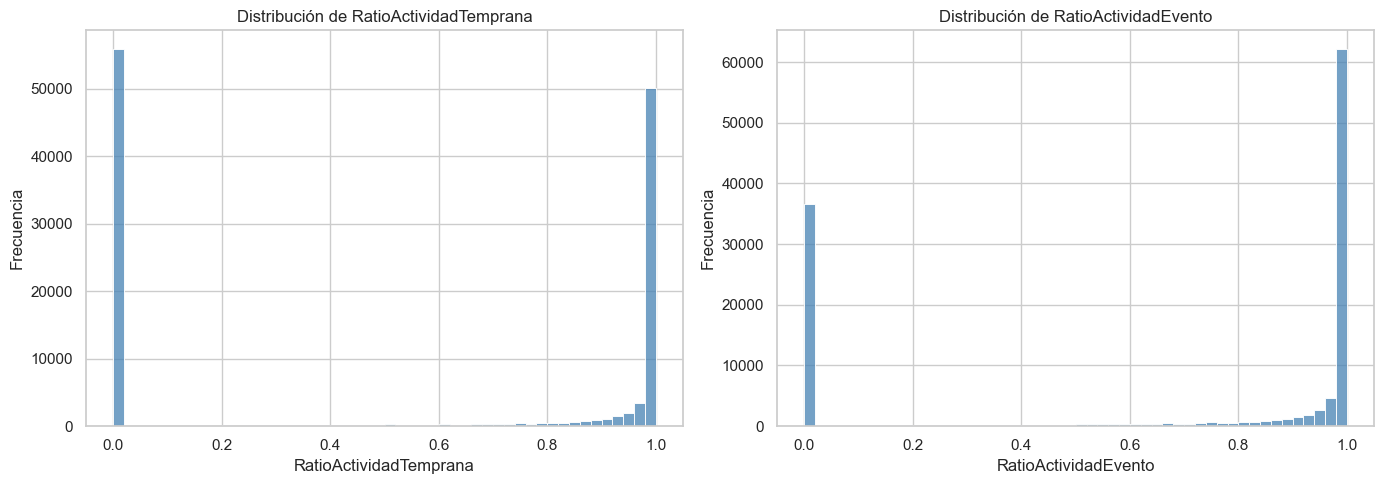

In [226]:

sns.set(style="whitegrid", palette="muted")

ratios = ["RatioActividadTemprana", "RatioActividadEvento"]

fig, axes = plt.subplots(1, 2, figsize=(14,5))

for i, ratio in enumerate(ratios):
    sns.histplot(
        data=clean_df,
        x=ratio,
        bins=50,
        kde=False,   # quitamos KDE para evitar errores
        ax=axes[i],
        color="steelblue"
    )
    axes[i].set_title(f"Distribución de {ratio}")
    axes[i].set_xlabel(ratio)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Tambien veamos la distribucion de las distintas variables de días:

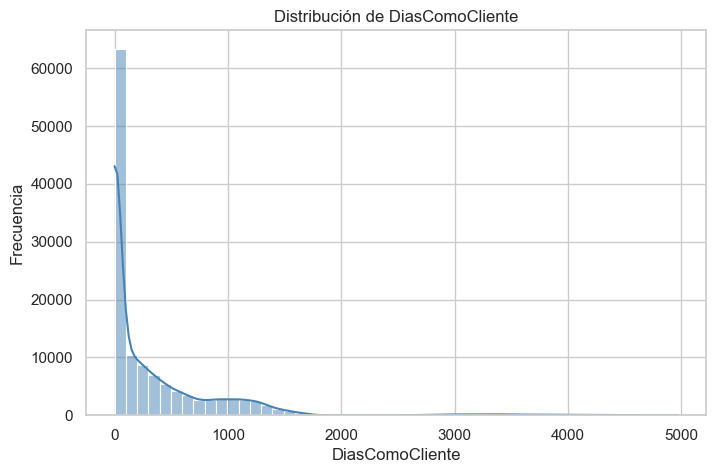

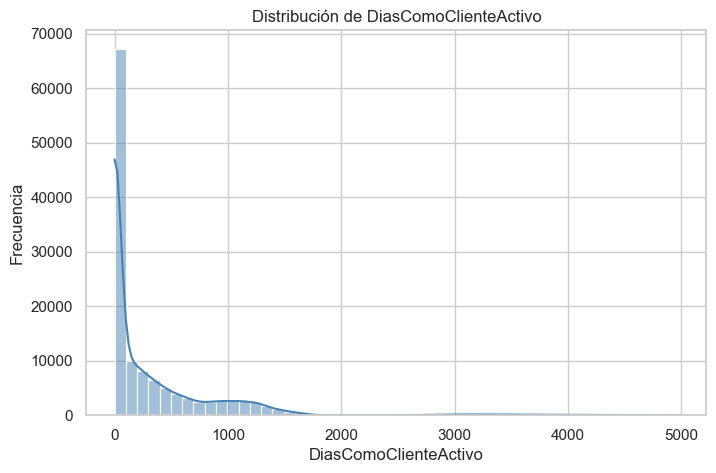

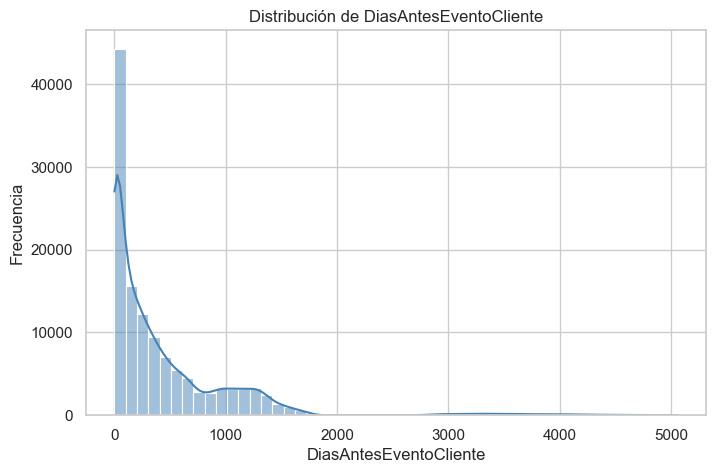

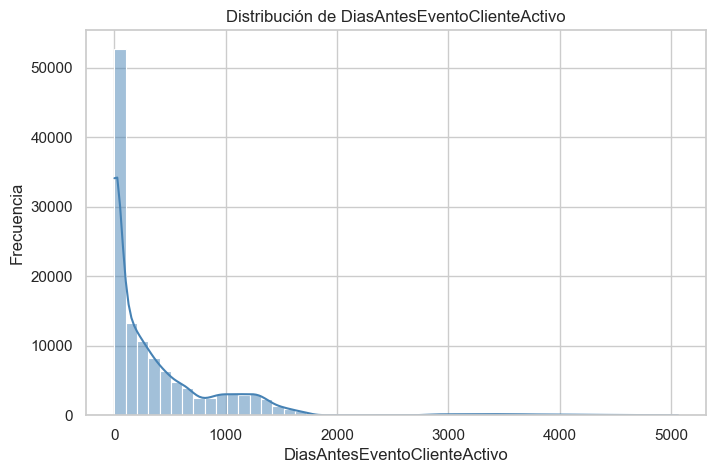

In [227]:
# Lista de variables de días
dias_vars = [
    "DiasComoCliente", 
    "DiasComoClienteActivo", 
    "DiasAntesEventoCliente", 
    "DiasAntesEventoClienteActivo"
]

# Estilo de gráficos
sns.set(style="whitegrid", palette="muted")

for col in dias_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=clean_df, 
        x=col, 
        bins=50, 
        kde=True,
        color="steelblue"
    )
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


Veamos la distribucion de nulos:

In [230]:
clean_df.isna().mean().sort_values(ascending=False) * 100

FechaUltimoUso                            28.414556
FechaPrimerUso                            28.414556
NumeroCreditosGPrevius                    25.238057
NumeroCreditosGCanalFPrevius              25.238057
NumeroCreditosGCanalVPrevius              25.238057
NumeroCreditosLEstadoPagadosPrevius       25.238057
NumeroCreditosLEstadoActivosPrevius       25.238057
NumeroCreditosGEstadoActivosPrevius       25.238057
NumeroCreditosGEstadoPagadosPrevius       25.238057
NumeroCreditosLPrevius                    25.238057
CategoriaPrincipalCredito                 18.075505
TotalPagosEfectuadosGlobalmentePrevius     3.907502
TotalPagosEfectuadosLocalmentePrevius      3.907502
DiasMaximosMoraCreditosGenerados           3.793684
Edad                                       1.243988
CupoAprobado                               0.217217
NumeroIntentosFallidos                     0.026451
ScoreCrediticio                            0.024848
CodigoMunicipioEntregaTC                   0.003206
TipoMunicipi

La siguiente variable de gran cantidad de nulos es la categoria de Numeros de Creditos, que como se mencionó, fue en la cual nos basamos para identificar nuevos clientes. Por tanto, asumir el valor de esta con respecto a si es un nuevo cliente sería una argumentación circular. Debido a que son muchas variables, sería dificil llenaras y por tanto se considera mejor la amputación de esta.

In [235]:
clean_df = clean_df[clean_df['NumeroCreditosGPrevius'].notna()]

Veamos otra vez la distribucion de nulos:

In [236]:
clean_df.isna().mean().sort_values(ascending=False) * 100

CategoriaPrincipalCredito                 21.407052
TotalPagosEfectuadosGlobalmentePrevius     5.226593
TotalPagosEfectuadosLocalmentePrevius      5.226593
DiasMaximosMoraCreditosGenerados           5.074352
FechaPrimerUso                             4.248818
FechaUltimoUso                             4.248818
Edad                                       0.997073
CupoAprobado                               0.186549
NumeroIntentosFallidos                     0.034308
ScoreCrediticio                            0.027875
CodigoMunicipioEntregaTC                   0.004288
TipoMunicipioEntregaTC                     0.004288
IdentificadorCliente                       0.000000
FechaEvento                                0.000000
UsabilidadCupo                             0.000000
NumeroCreditosLPrevius                     0.000000
NumeroCreditosGCanalVPrevius               0.000000
NumeroCreditosLEstadoPagadosPrevius        0.000000
NumeroCreditosLEstadoActivosPrevius        0.000000
NumeroCredit

Para este caso, debido a la alta cantidad de variables posibles, hagamos un one-hot-encoding de las distintas categorías y dejemos una caterogía como 'Desconocida'.

In [237]:
clean_df['CategoriaPrincipalCredito'] = clean_df['CategoriaPrincipalCredito'].fillna('Desconocido')

# Hacemos one-hot encoding
ohe = pd.get_dummies(clean_df['CategoriaPrincipalCredito'], prefix='Categoria')

# Unimos con el DataFrame original
clean_df = pd.concat([clean_df, ohe], axis=1)

Ahora, las variables que quedan con un mayor cantidad de nulos son de porcentaje muy bajo. Por tanto, se amputarán cada uno.

In [242]:
clean_df = clean_df.dropna()

Hagamos ahora otro one-hot encoding para las variables categóricas como: UsoAppWeb, Genero, CodigoMunicipio, CodigoAlmacen y CanalMunicipio. Para esto, primero veamos la cantidad de variables únicas por estas. 

In [250]:
categorical_cols = ['UsoAppWeb', 'Genero', 'CodigoMunicipioEntregaTC', 'CodigoAlmacenEntregaTC', 'CanalMunicipioEntregaTC', 'TipoMunicipioEntregaTC']

# Primero vemos los valores únicos de cada columna
for col in categorical_cols:
    print(f"Valores únicos en {col}:")
    print(clean_df[col].unique())
    print(len(clean_df[col].unique()))
    print("-" * 40)


Valores únicos en UsoAppWeb:
['App' 'Desconocido' 'Web']
3
----------------------------------------
Valores únicos en Genero:
['Femenino' 'Masculino' 'Desconocido']
3
----------------------------------------
Valores únicos en CodigoMunicipioEntregaTC:
[ 4.000e+00  1.000e+00  3.000e+00  8.800e+01  6.700e+01  4.900e+01
  6.300e+01  1.360e+02  1.340e+02 -1.000e+00  9.700e+01  1.330e+02
  1.370e+02  2.000e+00  1.510e+02  1.520e+02  5.900e+01  1.350e+02
  1.380e+02  4.600e+01  9.400e+01  1.460e+02  2.250e+02  1.450e+02
  1.310e+02  1.320e+02  1.390e+02  2.700e+01  7.300e+01  4.100e+01
  2.140e+02  1.036e+03  9.950e+02  2.200e+02  1.300e+02  1.400e+01
  2.160e+02  6.030e+02  9.020e+02  6.320e+02  2.220e+02  2.080e+02
  5.720e+02  2.230e+02  4.710e+02  2.180e+02  2.240e+02  1.400e+02
  3.400e+01  8.580e+02  1.043e+03  2.150e+02  1.410e+02  6.720e+02
  2.190e+02  1.430e+02  6.860e+02  4.260e+02  3.200e+01  2.050e+02
  7.640e+02  1.160e+02  2.170e+02  1.660e+02  2.110e+02  2.210e+02
  7.970e+02

Debido a su variabilidad e incapacidad de conocer una posición aproximada de los códigos de municipio ni el código del almacen, no se usarán estas para hacer encoding: hay demasiados datos y tampoco queremos alimentar al modelo con tantas variables. Solo haremos por tanto One-hot-encoding de las variables 

Aún así, podemos hallar los municipios de mayor incidencia con respecto a la PerdidaCartera y sí hacereles one-hot-encoding:

In [ ]:
top_municipios = (
    clean_df.groupby('CodigoMunicipioEntregaTC')['PerdidaCartera']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index  
)

print("Top 5 municipios con mayor PerdidaCartera promedio:")
print(top_municipios)

Top 5 municipios con mayor PerdidaCartera promedio:
Index([1096.0, 989.0, 1087.0, 980.0, 967.0], dtype='float64', name='CodigoMunicipioEntregaTC')


In [252]:
clean_df['MunicipioTop'] = clean_df['CodigoMunicipioEntregaTC'].where(
    clean_df['CodigoMunicipioEntregaTC'].isin(top_municipios),
    'Otros'
)

# One-hot encoding
clean_df = pd.get_dummies(clean_df, columns=['MunicipioTop'], prefix='Municipio')

Ahora sí, podemos usar las demas variables para hacerles un One-hot-encoding:

In [255]:
columnas_a_dummificar = ['Genero', 'UsoAppWeb', 'CanalMunicipioEntregaTC', 'TipoMunicipioEntregaTC']

clean_df = pd.get_dummies(clean_df, columns=columnas_a_dummificar, prefix=columnas_a_dummificar)

Así, tenemos entonces el siguiente dataframe para entrenamiento:

In [256]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82102 entries, 4 to 146930
Data columns (total 86 columns):
 #   Column                                    Non-Null Count  Dtype                         
---  ------                                    --------------  -----                         
 0   IdentificadorCliente                      82102 non-null  int64                         
 1   FechaEvento                               82102 non-null  datetime64[ns, America/Bogota]
 2   UsabilidadCupo                            82102 non-null  object                        
 3   CategoriaPrincipalCredito                 82102 non-null  object                        
 4   DiasMaximosMoraCreditosGenerados          82102 non-null  float64                       
 5   NumeroCreditosGPrevius                    82102 non-null  float64                       
 6   NumeroCreditosGCanalFPrevius              82102 non-null  float64                       
 7   NumeroCreditosGEstadoActivosPrevius       82

Pasemos las booleanas a 0,1

In [258]:
bool_cols = clean_df.select_dtypes(include='bool').columns

clean_df[bool_cols] = clean_df[bool_cols].astype(int)

In [295]:
clean_df = clean_df[clean_df['UsabilidadCupo'] != 'null']
clean_df['UsabilidadCupo'] = clean_df['UsabilidadCupo'].astype(float)

C:\Users\pablo\AppData\Local\Temp\ipykernel_16676\3880443604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['UsabilidadCupo'] = clean_df['UsabilidadCupo'].astype(float)


Veamos ahora el mapa de calor de las variables con respecto a la variable predictora

In [315]:
clean_df_heatmap = clean_df.drop(columns=['IdentificadorCliente', 'FechaEvento', 'FechaVinculacionCliente', 'FechaPrimerUso', 'FechaUltimoUso', 'CodigoAlmacenEntregaTC', 'CodigoMunicipioEntregaTC', 'CategoriaPrincipalCredito', 'DiasMora'])

C:\Users\pablo\AppData\Local\Temp\ipykernel_16676\1909809099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')


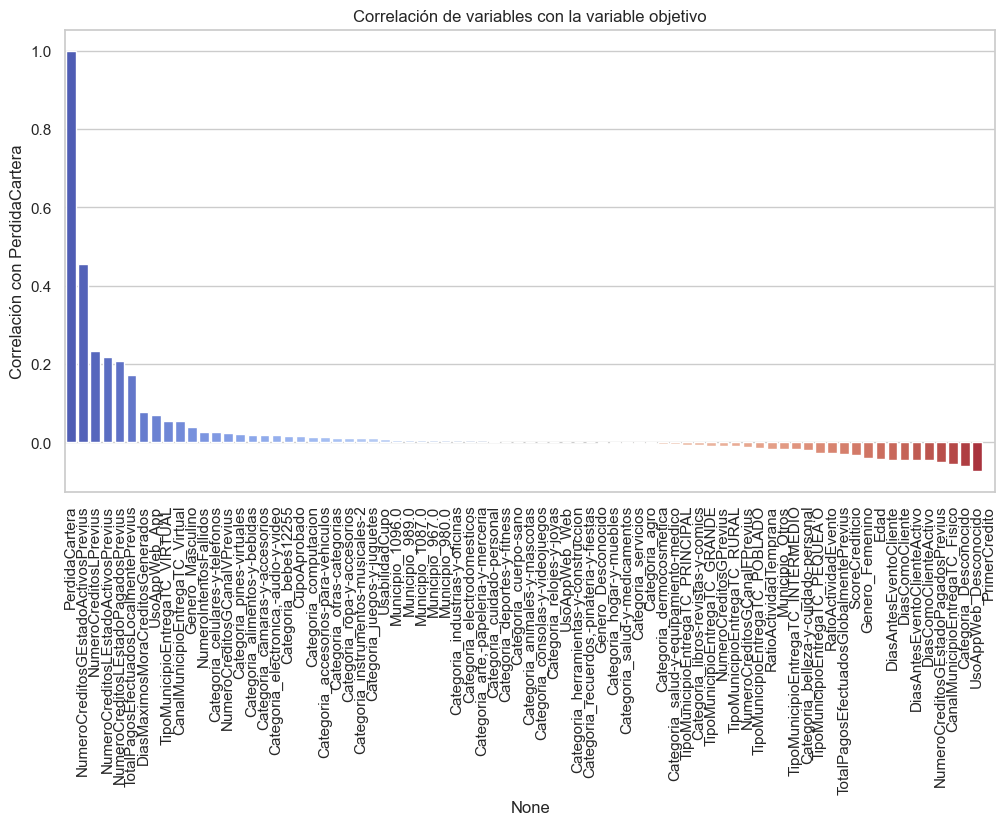

In [361]:
corr_with_target = clean_df_heatmap.corr()['PerdidaCartera'].sort_values(ascending=False)

# Plot vertical
plt.figure(figsize=(12,6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm')
plt.xticks(rotation=90)  # columnas verticales
plt.ylabel('Correlación con PerdidaCartera')
plt.title('Correlación de variables con la variable objetivo')
plt.show()

Como se puede observar, la variable de mayor relación es numero de creditos previos, numero de creditos activos,el uso de la aplicación y días mora. Aunque no parezca, score crediticio parece ser de las de menor valor, contrario a lo que se creería.

De esta correlación, podemos deshacernos las variables intermedias con correlación pequeña (menor a 0.2)

In [370]:
low_corr_vars = corr_with_target[abs(corr_with_target) < 0.1]

# Mostrar las variables y sus correlaciones
print(low_corr_vars)

DiasMaximosMoraCreditosGenerados       0.077933
UsoAppWeb_App                          0.069657
TipoMunicipioEntregaTC_VIRTUAL         0.055463
CanalMunicipioEntregaTC_Virtual        0.055463
Genero_Masculino                       0.039131
                                         ...   
DiasComoClienteActivo                 -0.045304
NumeroCreditosGEstadoPagadosPrevius   -0.051042
CanalMunicipioEntregaTC_Fisico        -0.055463
Categoria_Desconocido                 -0.059567
UsoAppWeb_Desconocido                 -0.072323
Name: PerdidaCartera, Length: 70, dtype: float64


Ahora un heatmap general, quitando las variables encontradas

In [371]:
lent = corr_with_target.__len__()
cols = low_corr_vars.index[1:lent-2]

In [372]:
cols = [i for i in cols]
print(cols)

['UsoAppWeb_App', 'TipoMunicipioEntregaTC_VIRTUAL', 'CanalMunicipioEntregaTC_Virtual', 'Genero_Masculino', 'NumeroIntentosFallidos', 'Categoria_celulares-y-telefonos', 'NumeroCreditosGCanalVPrevius', 'Categoria_pines-virtuales', 'Categoria_alimentos-y-bebidas', 'Categoria_camaras-y-accesorios', 'Categoria_electronica,-audio-y-video', 'Categoria_bebes12255', 'CupoAprobado', 'Categoria_computacion', 'Categoria_accesorios-para-vehiculos', 'Categoria_otras-categorias', 'Categoria_ropa-y-accesorios', 'Categoria_instrumentos-musicales-2', 'Categoria_juegos-y-juguetes', 'UsabilidadCupo', 'Municipio_1096.0', 'Municipio_989.0', 'Municipio_1087.0', 'Municipio_967.0', 'Municipio_980.0', 'Categoria_industrias-y-oficinas', 'Categoria_electrodomesticos', 'Categoria_arte,-papeleria-y-merceria', 'Categoria_cuidado-personal', 'Categoria_deportes-y-fitness', 'Categoria_cuerpo-sano', 'Categoria_animales-y-mascotas', 'Categoria_consolas-y-videojuegos', 'Categoria_relojes-y-joyas', 'UsoAppWeb_Web', 'Catego

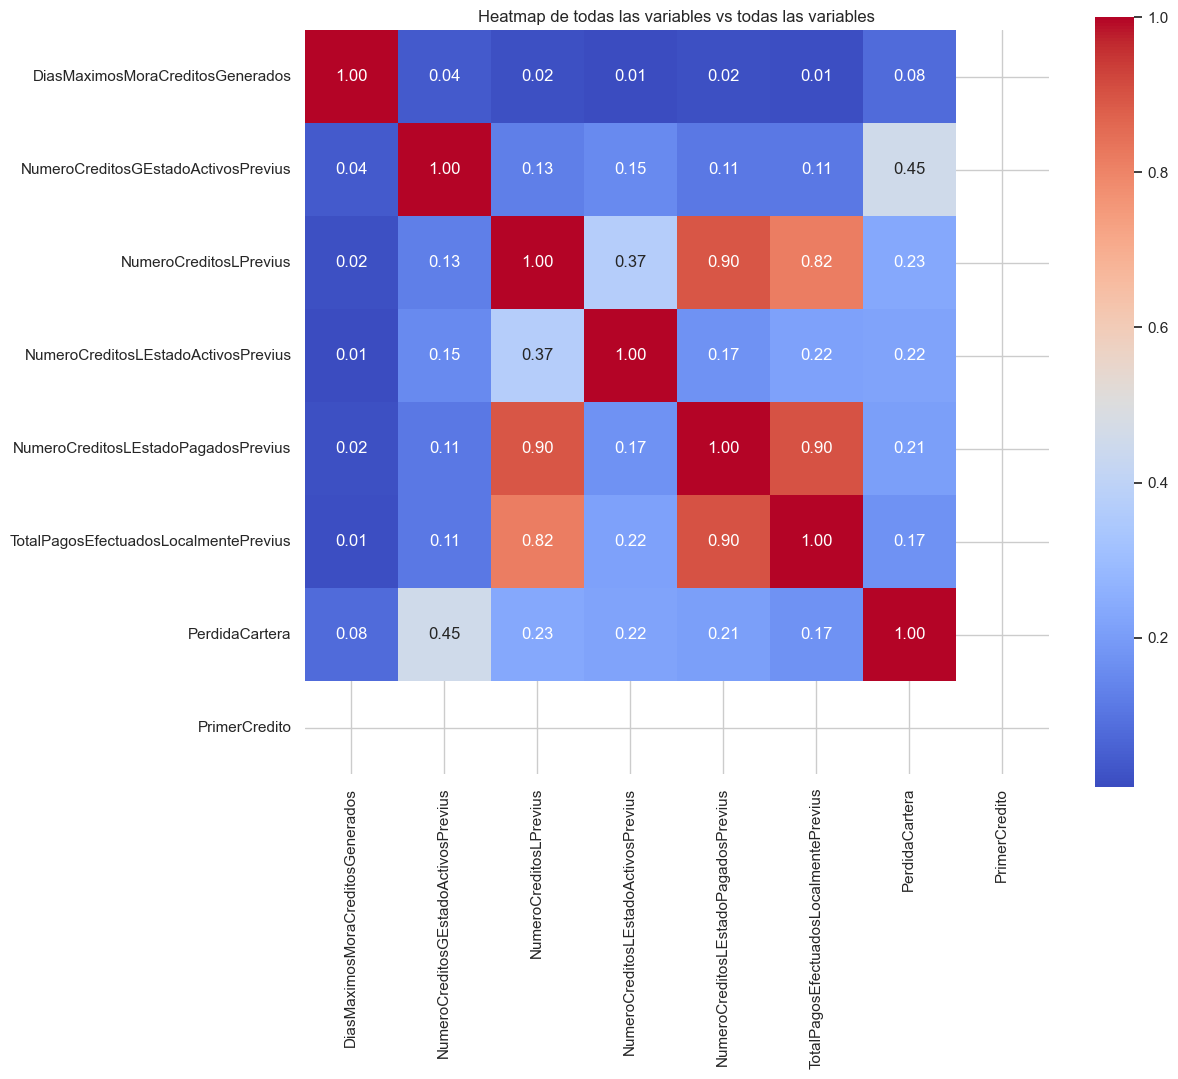

In [373]:
clean_df_complete_heatmap = clean_df_heatmap.drop(columns= cols)

corr_matrix = clean_df_complete_heatmap.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,      # muestra los valores de correlación
            fmt=".2f",       # formato de los números
            cmap="coolwarm", # paleta de colores
            cbar=True,       # muestra la barra de colores
            square=True)
plt.title("Heatmap de todas las variables vs todas las variables")
plt.show()

Como se puede observar, eliminar por medio de la correlación es un método que eliminaría demasiadas variables. Por tanto, usaremos  el selector de **Boruta**, un algoritmo que sirve como un método de selección de características; es decir, espera un sistema de información estándar que se le proporciona a un clasificador y determina cuáles de las características son importantes.
Lo importante es que **Boruta** realiza una clasificación clara de las características en lugar de simplemente ordenarlas, lo cual contrasta con muchos otros métodos de selección de características. Otra diferencia sustancial es que Boruta es un método “todo relevante”, por lo que su objetivo es encontrar todas las características relacionadas con la decisión, mientras que la mayoría de los otros métodos pertenecen a la clase óptima mínima, cuyo objetivo es proporcionar un conjunto posiblemente compacto de características que contengan suficiente información para lograr una clasificación óptima sobre el conjunto reducido.

In [ ]:
from boruta import BorutaPy

# Modelo de predicción
Teniendo ya los datos para hacer el modelo de clasificación, hagamos las predicciones para los tres siguientes modelos:
1. Modelo de regresión logística: Es un modelo simple, que nos dará una idea general de como clasificar a alguien. Está basado en la función sigmoide e intenta hallar una recta y = theta*x + b, donde theta, x y  b son vectores en R^n. La idea es que cuando se evalue esta recta en la función sigmoide, tengamos la mayor cantidad posible de valores correctos con respecto a los datos de entranamiento.
2. Modelo SVM: Es un modelo que haya la mejor separación de los datos. Principalmente, intenta identificar un hiperplano que separe de mejor forma a los datos, de forma que en un región queden aquellos de un label y en otra los que no.
3. Modelo Random Forest: Este modelo clasifica usando arboles de decisión aleatorios usando un método de Bagging, que muestrea de forma aleatoria los datos de entrenamiento y genera arboles de decisión para cada muestra - al final, "promedia" estos arboles. La idea es optimizar la escogencia de estos arboles de forma que se tengan las mejores predicciones.

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Pipeline para evaluar un modelo general:

Separación de la información:

In [317]:
X = clean_df.drop(columns=['PerdidaCartera', 'DiasMora', 'IdentificadorCliente', 'FechaEvento', 'FechaVinculacionCliente', 'FechaPrimerUso', 'FechaUltimoUso', 'CodigoAlmacenEntregaTC', 'CodigoMunicipioEntregaTC', 'CategoriaPrincipalCredito'])
y = clean_df['PerdidaCartera']

Separar en validacion, entranamiento y test

In [318]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)


In [319]:
#Escalado para variables en SVM y regresión logística (esto escala de forma normal las variables y así perder el sentido de proporcionalidad)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Función que evalua modelos:

In [385]:

def evaluate_model(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    print(f"==== {name} ====")
    
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicciones de probabilidad
    y_val_prob = model.predict_proba(X_val)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]
    
    # Predicciones discretas
    y_val_pred = (y_val_prob >= 0.5).astype(int)
    y_test_pred = (y_test_prob >= 0.5).astype(int)
    
    # ROC y AUC
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
    auc_val = roc_auc_score(y_val, y_val_prob)
    print(f"AUC validación: {auc_val:.3f}")
    
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    auc_test = roc_auc_score(y_test, y_test_prob)
    print(f"AUC test: {auc_test:.3f}")
    
    # Matriz de confusión
    cm_val = confusion_matrix(y_val, y_val_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    print("Matriz de confusión - validación:")
    print(cm_val)
    print("Matriz de confusión - test:")
    print(cm_test)
    
    # Plots
    plt.figure(figsize=(12,5))
    
    # ROC curve
    plt.subplot(1,2,1)
    plt.plot(fpr_val, tpr_val, label=f'Validación AUC={auc_val:.2f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC={auc_test:.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    
    # Matriz de confusión
    plt.subplot(1,2,2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp.plot(ax=plt.gca())
    plt.title(f'Matriz de Confusión Test - {name}')
    
    plt.show()

    return model, y_test, y_test_pred

Regresión Logística

==== Regresión Logística ====
AUC validación: 0.846
AUC test: 0.846
Matriz de confusión - validación:
[[12534   254]
 [ 1831  1278]]
Matriz de confusión - test:
[[12532   256]
 [ 1745  1364]]


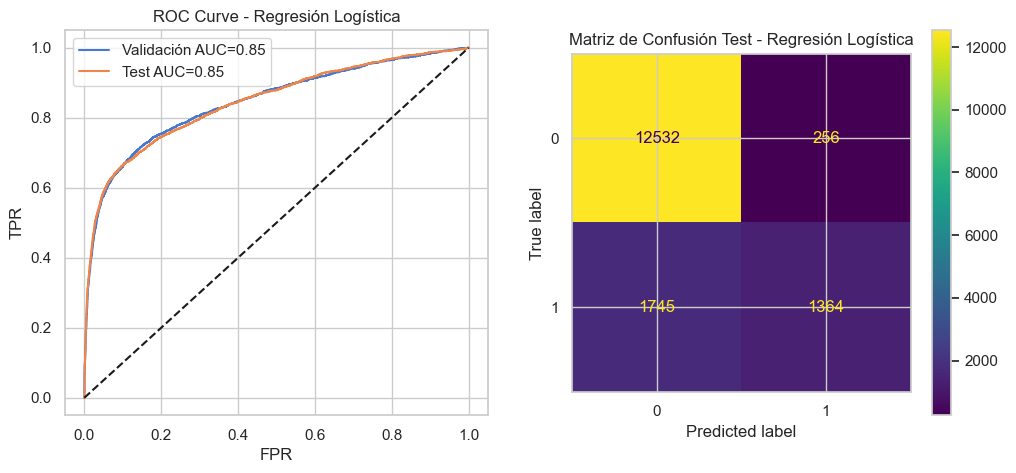

In [386]:
regresion_logistica_modelo, y_test_reglog, y_test_prob_reglog = evaluate_model('Regresión Logística', LogisticRegression(max_iter=1000) , X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

Las métricas que se obtienen son:

In [387]:
precision = precision_score(y_test_reglog, y_test_prob_reglog)   # TP / (TP + FP)
recall = recall_score(y_test_reglog, y_test_prob_reglog)         # TP / (TP + FN) -> minimizar FN
f1 = f1_score(y_test_reglog, y_test_prob_reglog)

print(f"Precisión: {precision:.3f}")
print(f"Recall (sensibilidad): {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Precisión: 0.842
Recall (sensibilidad): 0.439
F1-score: 0.577


Como se puede observar, la regresión logística tiene una precisión del 84%, una precisión buena para ser un modelo simple ante una cantidad tan alta de variables. Ahora, se debe mencionar que en este caso la precisión o sensibilidad es tambien una métrica de alto interés debido a que da una idea de la sensibilidad del modelo y su capacidad de detectar Falsos Negativos. En problemas de clasificación crediticia, es importante que los falsos negativos sean bajos, ya que es peligrosos que muchos casos que en realidad son morosos, pasen como no morosos. Por otro lado, los falsos positivos, aunque no sean buenos para el cliente, no son tan problemáticos como los falsos negativos.

In [388]:
import joblib
joblib.dump(regresion_logistica_modelo, "logreg_model.pkl")

['logreg_model.pkl']

SVM 

In [ ]:
svm_modelo, y_test_svm, y_test_prob_svm = evaluate_model('SVM', SVC(probability=True) , X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

==== SVM ====


El tiempo de ejecución de este modelo fue mucho más alto. Como se puede ver, su curva ROC se curva mínimamente y es menos recta que la del modelo logístico. Además, su matriz de confusión tiene mayores tags incorrectos: 128, para ser exactos.

In [307]:
joblib.dump(svm_modelo, "svm_model.pkl")

['svm_model.pkl']

==== Random Forest ====
AUC validación: 0.858
AUC test: 0.864
Matriz de confusión - validación:
[[12339   449]
 [ 1383  1726]]
Matriz de confusión - test:
[[12325   463]
 [ 1311  1798]]


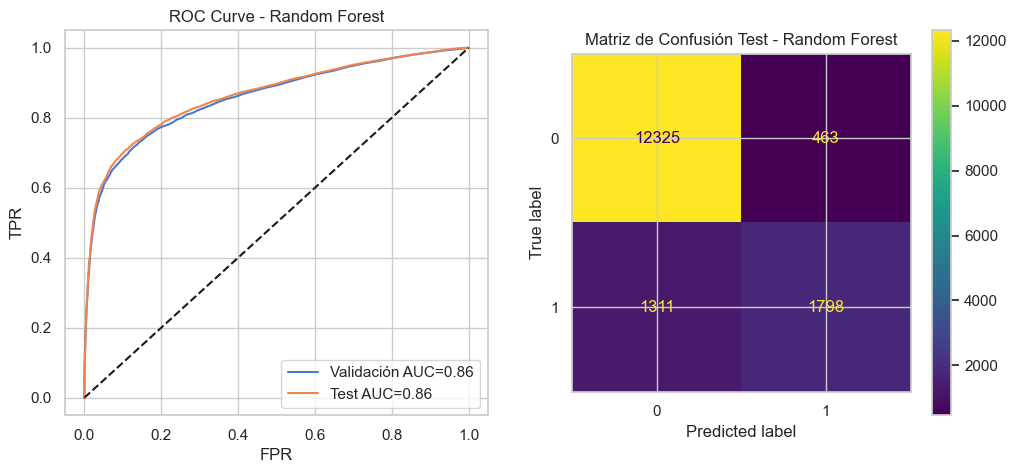

In [ ]:
random_forest_modelo, y_test_rf, y_test_prob_rf = evaluate_model('Random Forest', RandomForestClassifier(n_estimators=200, random_state=27) , X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

Finalmente, como se puede observar, el modelo Random Forest es el mejor para la clasificación de datos, debido a que cuenta con solo 1 tag distinto. Notese que como se consideró validación, el hecho de que el modelo funcione tan bien es más relacionado con que genuinamente fue capaz de generalizar el problema. 